# Question 2

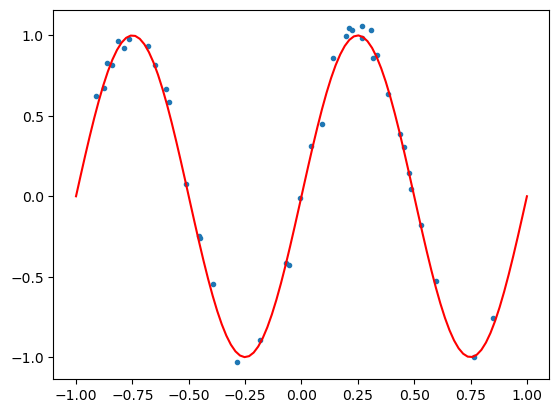

In [1]:
import numpy as np
import matplotlib.pyplot as plt

M=40
x = np.random.uniform(-1, 1, M)
epsilon = 0.1*np.random.uniform(-1, 1, M)
y = np.sin(2*np.pi*x) + epsilon
plt.plot(x,y, '.')
# regualar grid to actually plot sine function:
xgrid = np.linspace(-1, 1, 100)
ygrid = np.sin(2*np.pi*xgrid)
plt.plot(xgrid, ygrid, 'r')

In [2]:
# initialize weights and total Cost-weight gradients
W1 = 0.9*np.random.uniform(-1, 1, (50, 1))
W2 = 0.9*np.random.uniform(-1, 1, (50, 50))
W3 = 0.9*np.random.uniform(-1, 1, (1, 50))

dC_dW1 = np.zeros((50, 1))
dC_dW2 = np.zeros((50, 50))
dC_dW3 = np.zeros((1, 50))

# initialize bias vectors and total Cost-bias gradients
b1 = 0.1*np.random.uniform(-1, 1, (50, 1))
b2 = 0.1*np.random.uniform(-1, 1, (50, 1))
b3 = 0.1*np.random.uniform(-1, 1, (1, 1))

dC_db1 = np.zeros((50, 1))
dC_db2 = np.zeros((50, 1))
dC_db3 = np.zeros((1, 1))

# define learning rate
alpha = 0.045

In [3]:
def fnn(x,w1,w2,w3,b1,b2,b3,sigma):
    '''
    fnn is the forward neural network function. Computes the forward pass
    '''
    y_hat=w3@sigma(w2@sigma(w1*x+b1)+b2)+b3
    return(y_hat)

In [4]:
def sin_true(x):
    '''
    ground truth sine function
    '''
    return(np.sin(2*np.pi*x))

In [5]:
def loss(y,y_hat):
    '''
    Manual MSE function
    '''
    return((y-y_hat)**2)

In [6]:
'''
Activation function tanh and its derivative
'''

def sigma(z):
  return np.tanh(z)

def sigma_prime(z):
  return 1 - np.tanh(z)**2

In [8]:
'''
The deep learning algorithm from DL3.6 (Algorithm 1)
'''
from IPython import display

Epochs=1000
y_pred_array=np.zeros(len(y))
C_total=0
for epoch in range(Epochs):
  dC_dW1_sum = np.zeros((50, 1))
  dC_dW2_sum = np.zeros((50, 50))
  dC_dW3_sum = np.zeros((1, 50))
  dC_db1_sum = np.zeros((50, 1))
  dC_db2_sum = np.zeros((50, 1))
  dC_db3_sum = np.zeros((1, 1)) 
  for i in range(M): # loop over samples
    y_pred=fnn(x[i],W1,W2,W3,b1,b2,b3,sigma)
    y_pred_array[i]=y_pred
    C=loss(y[i],y_pred)
    C_total+=C
    z1=W1*x[i]+b1
    a1=sigma(z1)
    z2=W2@a1+b2
    a2=sigma(z2)
    a3=W3@a2+b3

    delta3=-1*(y[i]-y_pred)
    
    delta2=W3.T@delta3*sigma_prime(z2)
    delta1=W2.T@delta2*sigma_prime(z1)
    dc_dw3=delta3@a2.T
    dc_dw2=delta2@a1.T
    dc_dw1=delta1*x[i]
    dC_dW1_sum+=dc_dw1
    dC_dW2_sum+=dc_dw2
    dC_dW3_sum+=dc_dw3
    dC_db1_sum+=delta1
    dC_db2_sum+=delta2
    dC_db3_sum+=delta3
  C_total=C_total/M
  dC_dW1=dC_dW1_sum/M
  dC_dW2=dC_dW2_sum/M
  dC_dW3=dC_dW3_sum/M
  dC_db1=dC_db1_sum/M
  dC_db2=dC_db2_sum/M
  dC_db3=dC_db3_sum/M
  W1-=alpha*dC_dW1
  W2-=alpha*dC_dW2
  W3-=alpha*dC_dW3
  b1-=alpha*dC_db1
  b2-=alpha*dC_db2
  b3-=alpha*dC_db3

  plt.clf()
  plt.plot(x,y_pred_array, '.',label="predicted")
# regualar grid to actually plot sine function:
  xgrid = np.linspace(-1, 1, 100)
  ygrid = np.sin(2*np.pi*xgrid)
  plt.plot(xgrid, ygrid, 'r',label="True Sine")
  plt.plot(x, np.sin(2*np.pi*x), 'g^',label="Validation")
  plt.ylim([-1.1,1.1])
  plt.legend()
  #save plots to png files to create .gif (pronounced Xylophone movie)
  plt.show()
  display.clear_output(wait = True) # To animate


KeyboardInterrupt: 

# Question 3

In [9]:

import torch
import torch.nn as nn

In [10]:
class mySinNet(nn.Module):
    '''
    Neural network to approximate sine function from random data
    '''
    def __init__(self,input_size,hidden_size,output_size) -> None:

        super(mySinNet, self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.output_size=output_size

        self.i2h=nn.Linear(input_size,hidden_size)
        self.h2h=nn.Linear(hidden_size,hidden_size)
        self.h2o=nn.Linear(hidden_size,output_size)
    def forward(self,x):
        x=torch.tanh(self.i2h(x))
        x=torch.tanh(self.h2h(x))
        x=self.h2o(x)
        return(x)
    

In [11]:
model=mySinNet(40,50,40) #input size, neurons, output size


In [12]:
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.0002)

In [13]:
data_X=torch.tensor([[x] for x in x],dtype=torch.float)
data_Y=torch.tensor([[y] for y in y],dtype=torch.float)
print(data_X.shape)

torch.Size([40, 1])


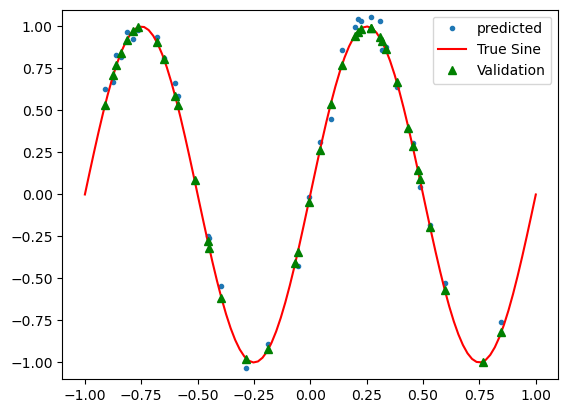

In [14]:
'''
DL algorithm with the pytorch wrapper
'''

# training the model and plotting the loss.

losses=[]


EPOCHS=500

for epoch in range(EPOCHS):
    #clear the gradients of the optimizer before running the back propagation
    optimizer.zero_grad()
    # get the model prediction through a forward pass
    pred_y=model(data_X.T)
    #print(pred_y.shape,data_Y.shape)
    # calculate the loss, using the model pred and ground obs
    loss=criterion(pred_y.T,data_Y)
    # Back propagation
    loss.backward()

    # update all trainable parameters
    optimizer.step()

    #Append the losses
    losses.append(loss.item())
    plt.clf()
    plt.plot(x,pred_y.detach().numpy()[0,:], '.',label="predicted")
# regualar grid to actually plot sine function:
    xgrid = np.linspace(-1, 1, 100)
    ygrid = np.sin(2*np.pi*xgrid)
    plt.plot(xgrid, ygrid, 'r',label="True Sine")
    plt.plot(x, np.sin(2*np.pi*x), 'g^',label="Validation")
    plt.ylim([-1.1,1.1])
    plt.legend()
    plt.show()
    display.clear_output(wait = True) # To animate


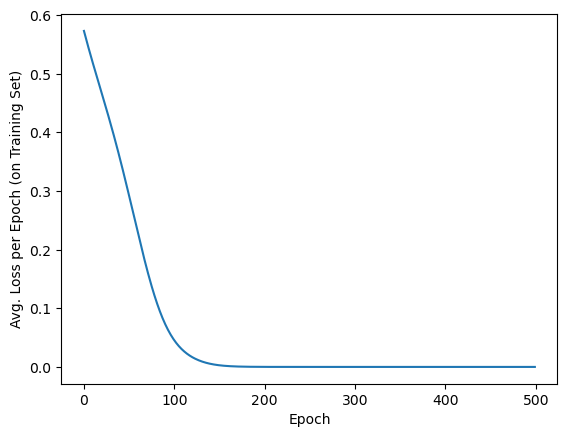

In [15]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Avg. Loss per Epoch (on Training Set)')
plt.show()